In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("/kaggle/input/climate-dataset/Climate Dataset.csv")
dataset.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Condition,Temperature,Humidity,Wind_Speed,Rain_Fall,CO2_Level,Location
0,stormy,15.525100,76.556844,118.796162,36.320828,430.285321,Tokyo
1,stormy,26.673453,93.555140,61.080368,68.102935,484.526746,Tokyo
2,stormy,20.296541,73.299961,66.953370,76.569598,438.623026,Sydney
3,stormy,NaN,85.639415,59.154909,161.613721,401.681406,Tokyo
4,stormy,19.204439,83.418368,91.753179,51.963129,475.389114,Mumbai


In [3]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Condition    300 non-null    object 
 1   Temperature  293 non-null    float64
 2   Humidity     294 non-null    float64
 3   Wind_Speed   300 non-null    float64
 4   Rain_Fall    300 non-null    float64
 5   CO2_Level    300 non-null    float64
 6   Location     300 non-null    object 
dtypes: float64(5), object(2)
memory usage: 16.5+ KB


,Temperature,Humidity,Wind_Speed,Rain_Fall,CO2_Level
count,293.000000,294.000000,300.000000,300.000000,300.000000
mean,17.892804,82.885205,38.757265,44.820475,432.419665
std,5.977551,9.761572,34.856850,52.448405,22.946214
min,5.001589,60.247122,5.063965,0.021328,400.193424
25%,13.848236,76.399355,12.956261,3.818818,414.806961
50%,17.650237,83.715927,19.204791,27.613613,429.421289
75%,22.633057,90.400116,69.200418,59.868995,444.133188
max,29.963027,99.984663,119.391611,197.807584,499.292700


In [4]:
(dataset.isnull().sum()/(dataset.shape[0]*dataset.shape[0]))*100

Condition      0.000000
Temperature    0.007778
Humidity       0.006667
Wind_Speed     0.000000
Rain_Fall      0.000000
CO2_Level      0.000000
Location       0.000000
dtype: float64

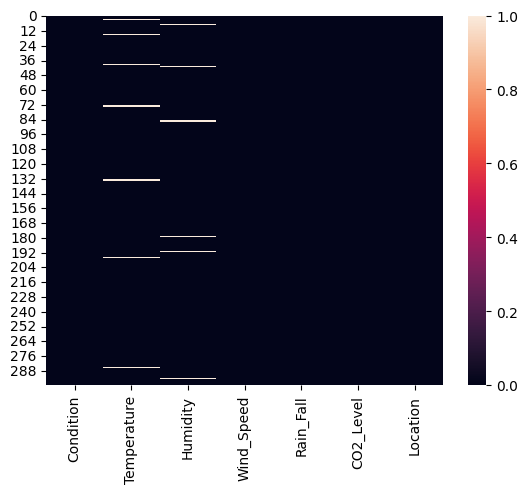

In [5]:
sns.heatmap(dataset.isnull())
plt.show()

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Identify numeric columns in the dataset
numeric_columns = dataset.select_dtypes(include=["number"]).columns

# Apply imputation to numeric columns
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

# Check for missing values after imputation
print("\nAfter Imputation:")
print(dataset.isnull().sum())


After Imputation:
Condition      0
Temperature    0
Humidity       0
Wind_Speed     0
Rain_Fall      0
CO2_Level      0
Location       0
dtype: int64


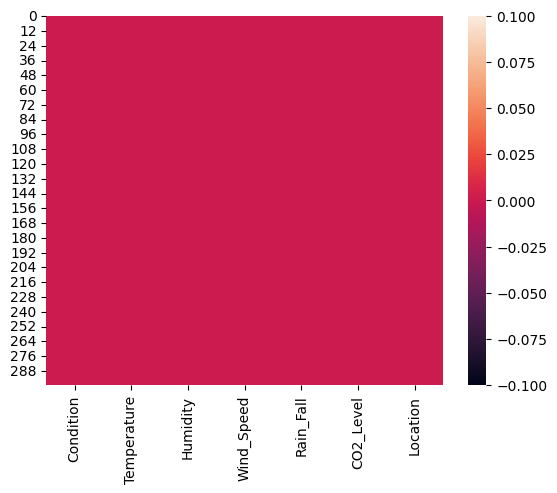

In [7]:
sns.heatmap(dataset.isnull())
plt.show()

In [8]:
numerical_features = dataset.select_dtypes(include ="number")
numerical_features.head(5)

,Temperature,Humidity,Wind_Speed,Rain_Fall,CO2_Level
0,15.525100,76.556844,118.796162,36.320828,430.285321
1,26.673453,93.555140,61.080368,68.102935,484.526746
2,20.296541,73.299961,66.953370,76.569598,438.623026
3,17.892804,85.639415,59.154909,161.613721,401.681406
4,19.204439,83.418368,91.753179,51.963129,475.389114


In [9]:
categorical_features = dataset.select_dtypes(include ="object")
categorical_features.head(5)

,Condition,Location
0,stormy,Tokyo
1,stormy,Tokyo
2,stormy,Sydney
3,stormy,Tokyo
4,stormy,Mumbai


In [10]:
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# label_encoder = LabelEncoder()
# dataset['Weather_Conditions'] = label_encoder.fit_transform(dataset['Weather_Conditions'])
# dataset['Geographic_Location'] = label_encoder.fit_transform(dataset['Geographic_Location'])


from sklearn.preprocessing import LabelEncoder
for col in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    le.fit(dataset[col])
    dataset[col] = le.transform(dataset[col])
# print(hello)
    #print(dataset[col].unique())
    print(pd.DataFrame({'Original': le.classes_, 'Encoded': range(len(le.classes_))}))

  Original  Encoded
0   cloudy        0
1    rainy        1
2   stormy        2
   Original  Encoded
0    London        0
1    Mumbai        1
2  New York        2
3    Sydney        3
4     Tokyo        4


In [11]:

dataset.head(3)


,Condition,Temperature,Humidity,Wind_Speed,Rain_Fall,CO2_Level,Location
0,2,15.525100,76.556844,118.796162,36.320828,430.285321,4
1,2,26.673453,93.555140,61.080368,68.102935,484.526746,4
2,2,20.296541,73.299961,66.953370,76.569598,438.623026,3


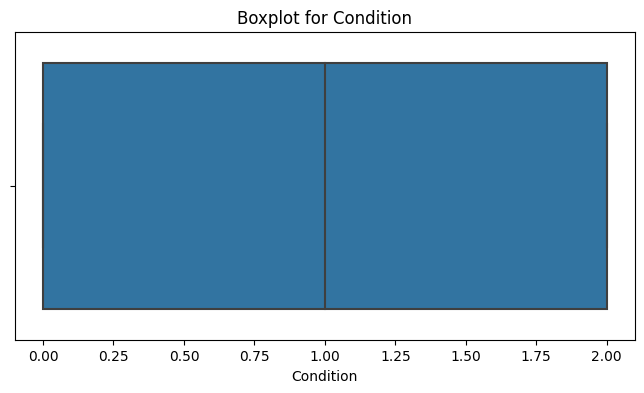

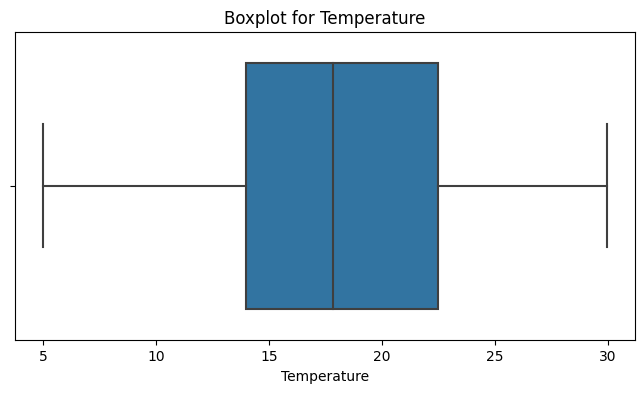

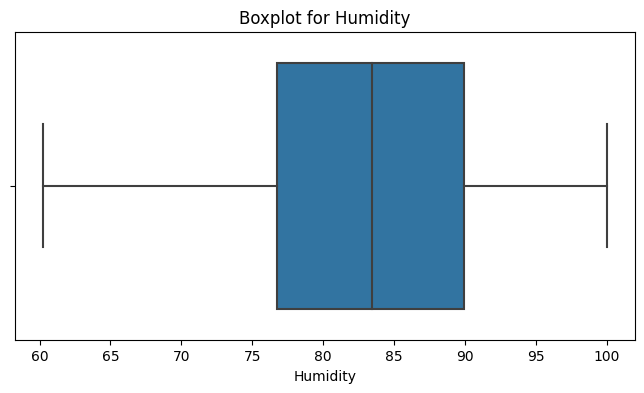

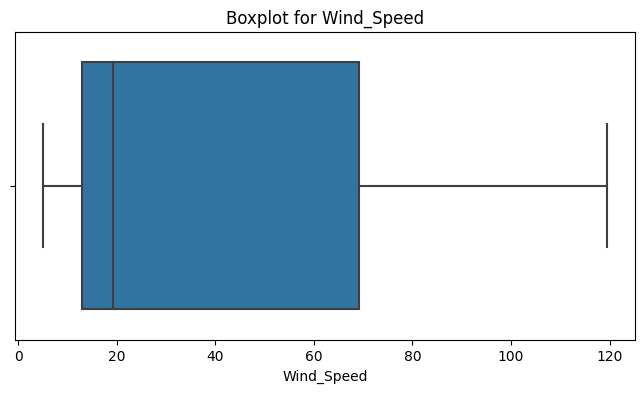

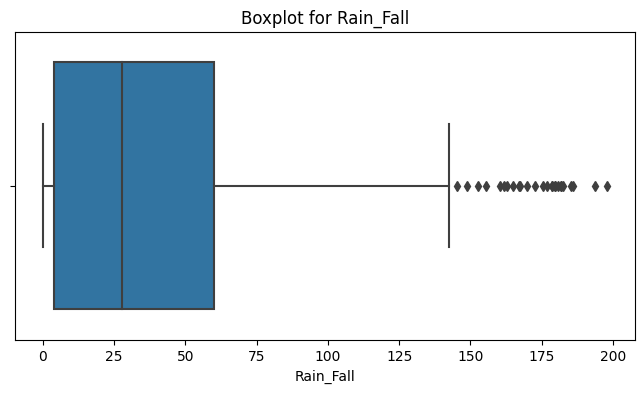

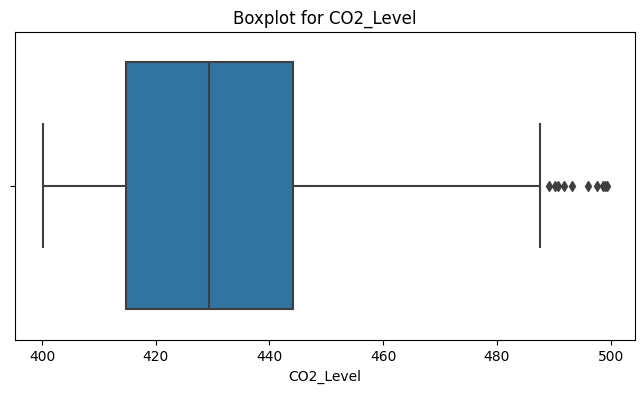

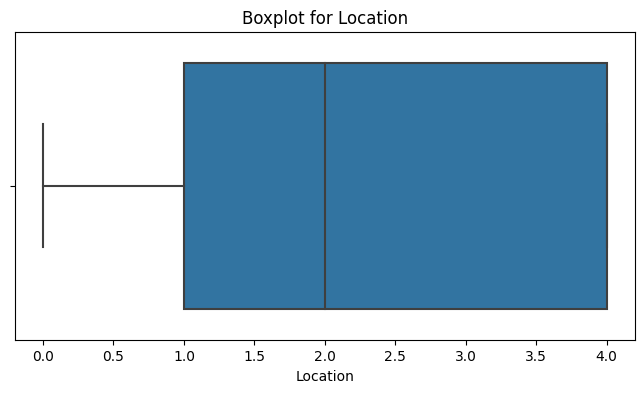

In [12]:
# Iterate over all numerical columns
for col in dataset.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col],data=dataset)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [13]:




# Iterate through each numerical column to remove outliers
for column in dataset.select_dtypes(include="number").columns:

    print(f"Processing column: {column}")
    
    # Calculate Q1, Q3, and IQR
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define outlier thresholds
    min_range = q1 - (1.5 * iqr)
    max_range = q3 + (1.5 * iqr)
    
    # print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
    # print(f"Outlier thresholds for {column}: [{min_range}, {max_range}]")
    
    # Remove outliers for this column
    dataset = dataset[(dataset[column] >= min_range) & (dataset[column] <= max_range)]







Processing column: Condition
Processing column: Temperature
Processing column: Humidity
Processing column: Wind_Speed
Processing column: Rain_Fall
Processing column: CO2_Level
Processing column: Location


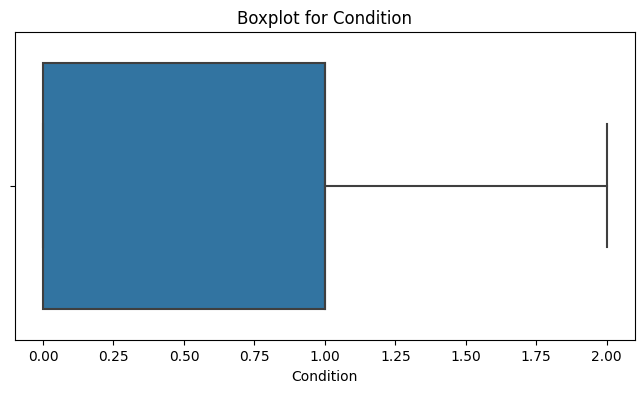

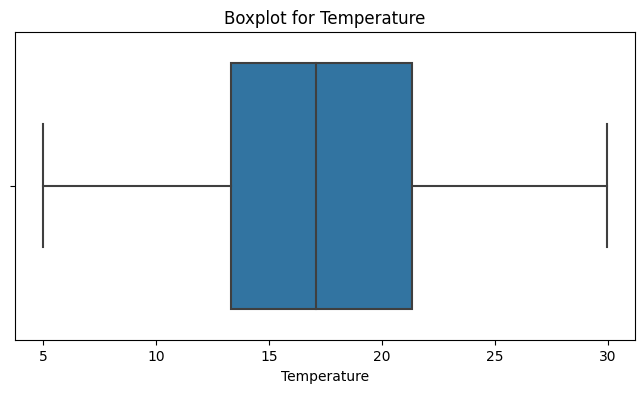

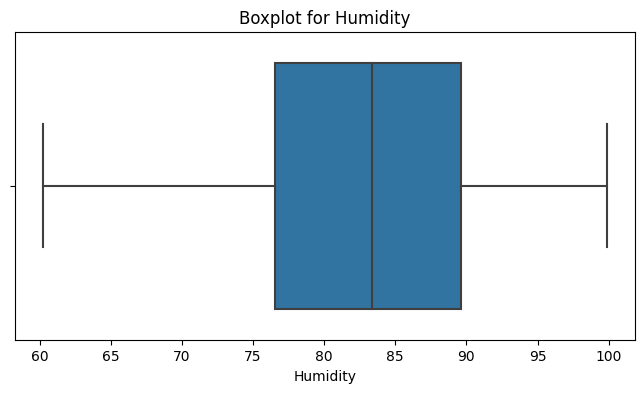

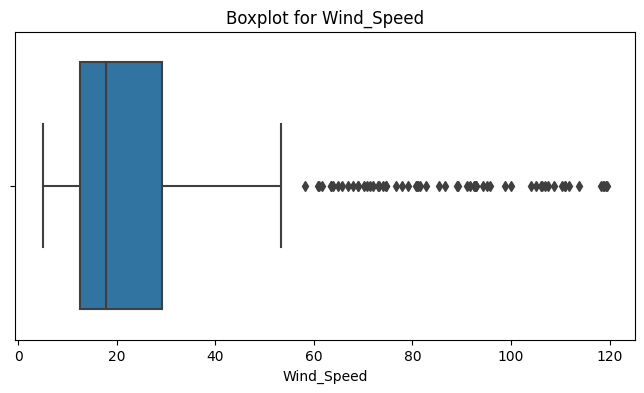

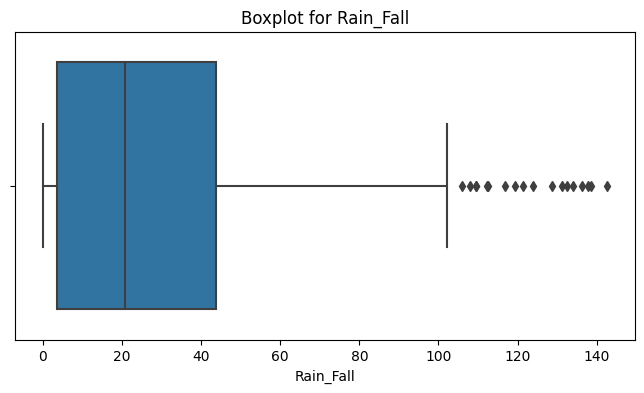

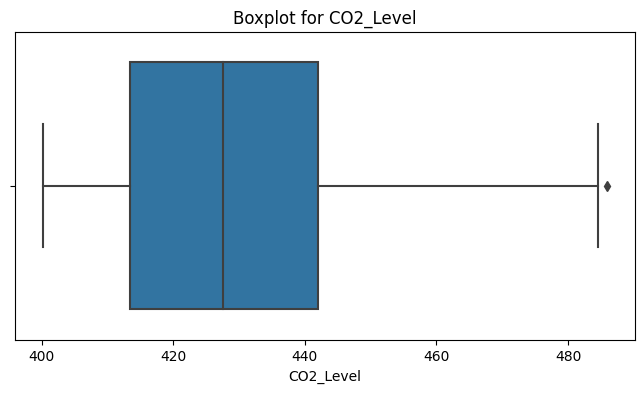

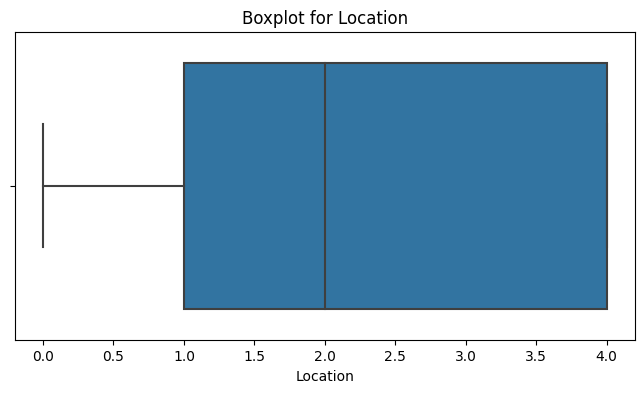

In [14]:
# Iterate over all numerical columns
for col in dataset.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col],data=dataset)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [15]:
dataset.head(3)

,Condition,Temperature,Humidity,Wind_Speed,Rain_Fall,CO2_Level,Location
0,2,15.525100,76.556844,118.796162,36.320828,430.285321,4
1,2,26.673453,93.555140,61.080368,68.102935,484.526746,4
2,2,20.296541,73.299961,66.953370,76.569598,438.623026,3


In [16]:

from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Select columns to scale (numerical ones)
columns_to_scale = ['Temperature', 'Humidity', 'Wind_Speed', 'CO2_Level', 'Rain_Fall', 'Location']

# Apply scaling
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])
dataset.head(3)

# Display scaled data



,Condition,Temperature,Humidity,Wind_Speed,Rain_Fall,CO2_Level,Location
0,2,-0.294576,-0.617750,2.682626,0.155029,0.066677,1.247243
1,2,1.659250,1.119065,0.880782,1.068084,2.909227,1.247243
2,2,0.541652,-0.950525,1.064132,1.311320,0.503618,0.579527


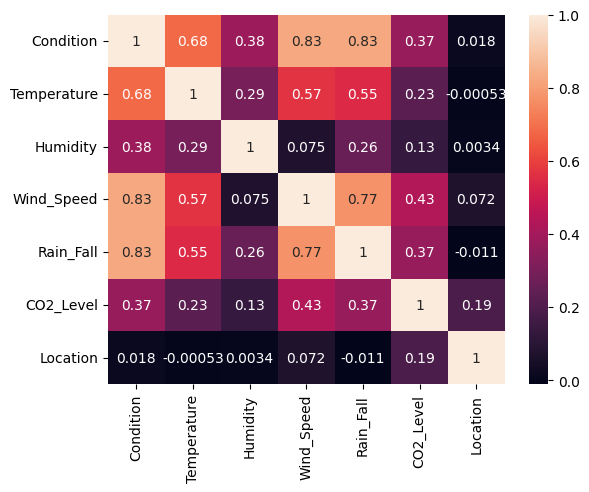

In [17]:
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
x = dataset[columns_to_scale]
y = dataset["Condition"]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
# print("Decision Tree Classification")
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
# y_pred_dt = dt_classifier.predict(X_test)

DecisionTreeClassifier()

In [20]:
dt_classifier.score(X_test,y_test)*100

100.0

In [21]:
# from sklearn.metrics import accuracy_score, classification_report
# dt_predictions = dt_classifier.predict(X_test)
# dt_accuracy = accuracy_score(y_test, dt_predictions)
# dt_accuracy
dt_classifier.score(X_train,y_train)*100

100.0

In [22]:
dt_classifier.predict([[-0.294576,	-0.617750	,2.682626,	0.155029,	0.066677,	1.247243]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [23]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(dataset[columns_to_scale])

# Display cluster centroids
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 0.05041128  0.6254433  -0.44452235 -0.22822025 -0.22596531 -0.04196242]
 [ 1.00565709  0.02580887  1.67351312  0.88346152  1.41352757  0.12720336]
 [-0.94389323 -1.13572299 -0.62972476 -0.34391755 -0.79812629 -0.03330814]]


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cosine Similarity Matrix (first 5 rows):
[[1.         0.25512974 0.64765326 0.41797088 0.5886903 ]
 [0.25512974 1.         0.50714421 0.70578385 0.8203091 ]
 [0.64765326 0.50714421 1.         0.52604607 0.51699404]
 [0.41797088 0.70578385 0.52604607 1.         0.61543024]
 [0.5886903  0.8203091  0.51699404 0.61543024 1.        ]]


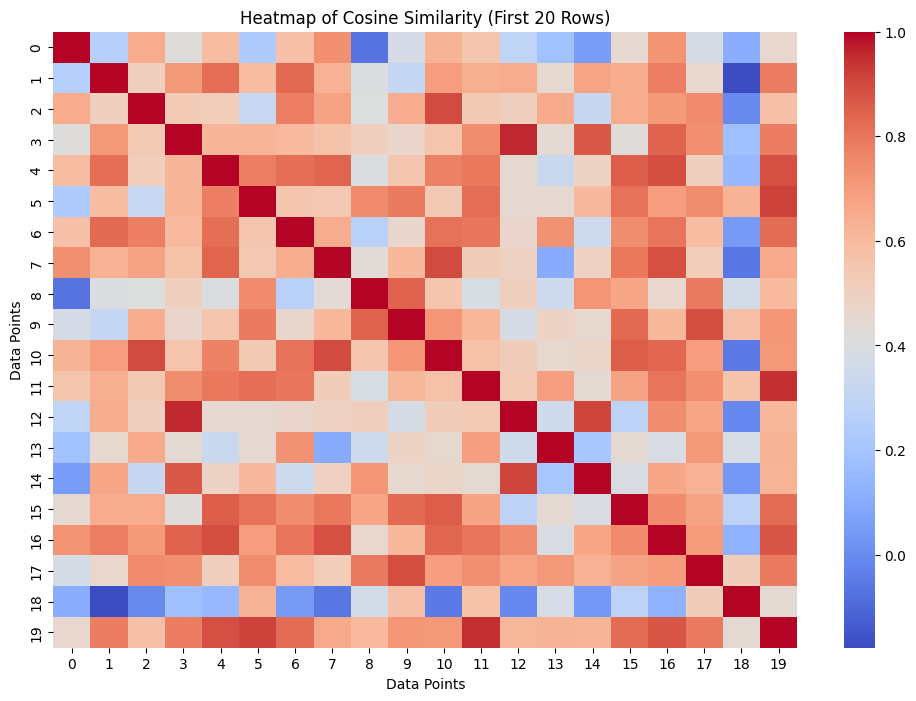

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(dataset[columns_to_scale])
print("Cosine Similarity Matrix (first 5 rows):")
print(similarity_matrix[:5, :5])



import seaborn as sns

# Heatmap of cosine similarity
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix[:20, :20], cmap='coolwarm', annot=False)
plt.title('Heatmap of Cosine Similarity (First 20 Rows)')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()


Euclidean Dissimilarity Matrix (first 5 rows):
[[0.         4.35825277 2.3245015  3.37959559 3.10636576]
 [4.35825277 0.         3.44351661 2.85658592 2.32070703]
 [2.3245015  3.44351661 0.         2.77495553 3.16753856]
 [3.37959559 2.85658592 2.77495553 0.         3.05816674]
 [3.10636576 2.32070703 3.16753856 3.05816674 0.        ]]


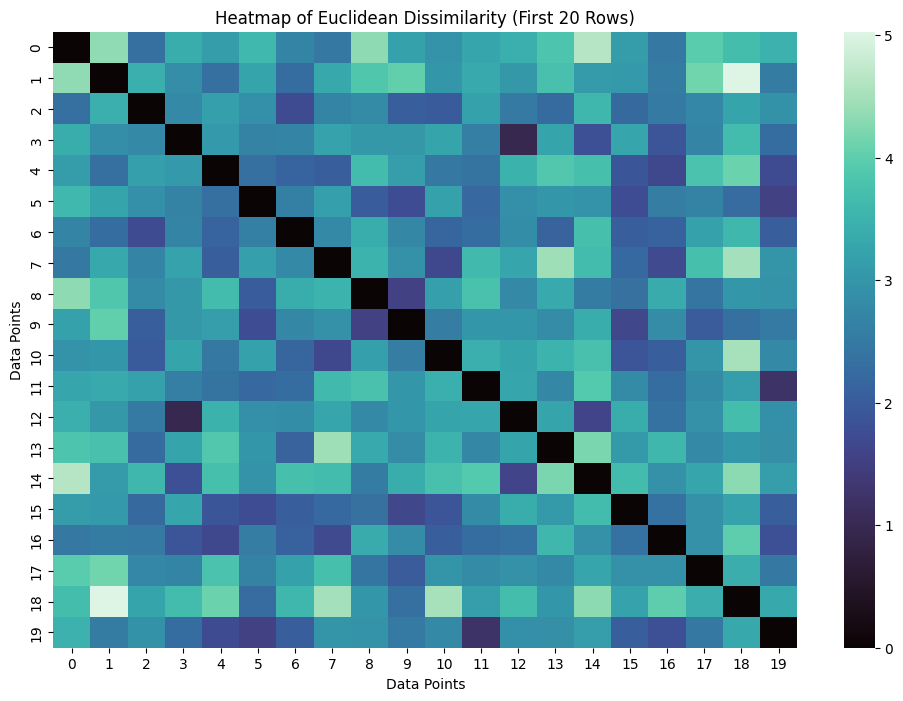

In [25]:
from scipy.spatial.distance import cdist

# Compute Euclidean distance
dissimilarity_matrix = cdist(dataset[columns_to_scale], dataset[columns_to_scale], metric='euclidean')
print("Euclidean Dissimilarity Matrix (first 5 rows):")
print(dissimilarity_matrix[:5, :5])

# Heatmap of Euclidean dissimilarity
plt.figure(figsize=(12, 8))
sns.heatmap(dissimilarity_matrix[:20, :20], cmap='mako', annot=False)
plt.title('Heatmap of Euclidean Dissimilarity (First 20 Rows)')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()




/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

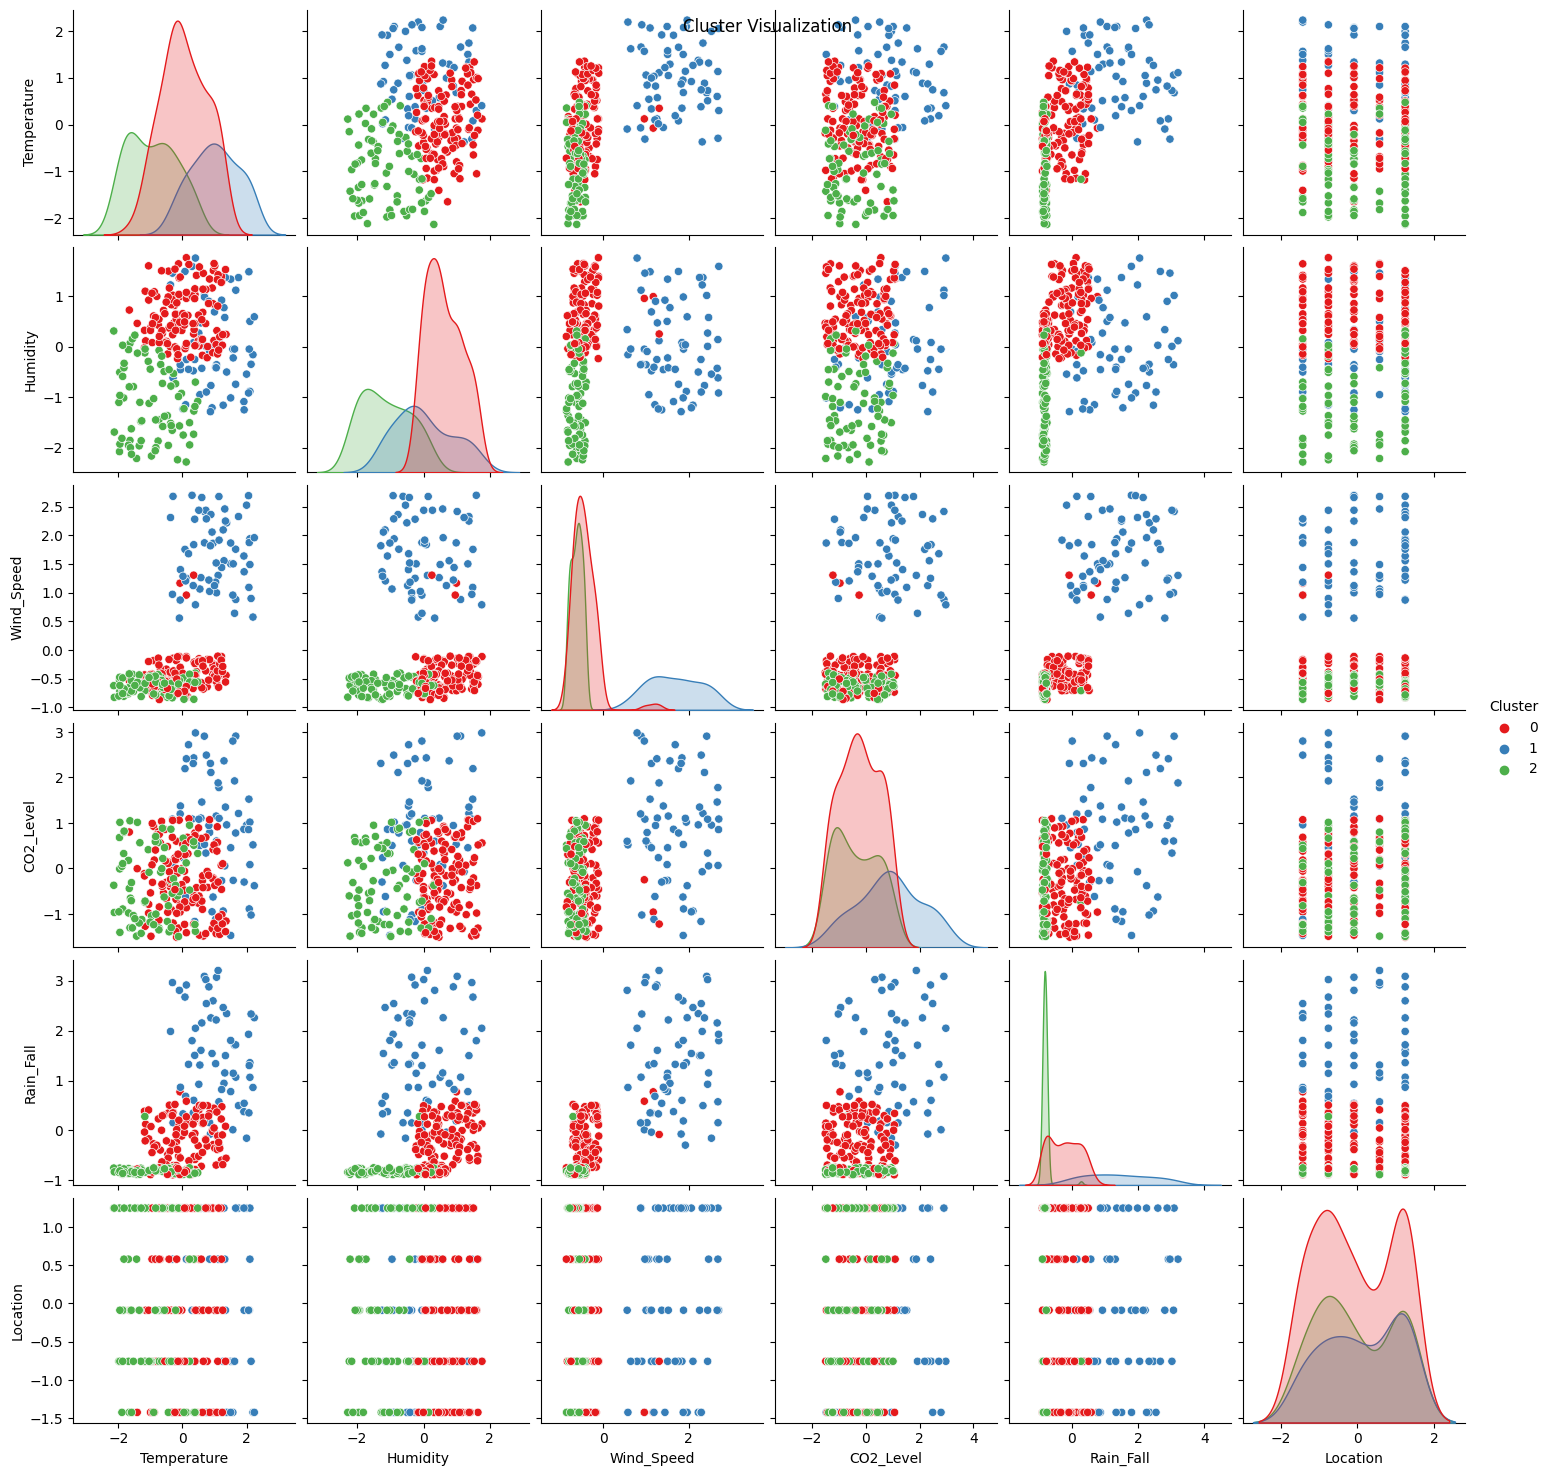

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters with a pair plot
sns.pairplot(dataset, vars=columns_to_scale, hue='Cluster', palette='Set1')
plt.suptitle("Cluster Visualization")
plt.show()
